In [3]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", header=0, index_col=0, parse_dates=[0])

In [3]:
print(df.columns)

Index(['perp_bid', 'perp_ask', 'perp_mid', 'perp_featdummy'], dtype='object')


In [4]:
cols = list(df.columns)
for col in cols:
    if col not in ['perp_mid', 'perp_bid', 'perp_ask', 'future_mid', 'future_bid', 'future_ask']:
        if "feat_" not in col:
            df.rename(columns={col:'feat_' + col}, inplace=True)
df.to_csv('data.csv', header=True)

In [6]:
print(df.index)

DatetimeIndex(['2023-01-09 00:00:00.229000', '2023-01-09 00:00:00.333000',
               '2023-01-09 00:00:00.449000', '2023-01-09 00:00:00.518000',
               '2023-01-09 00:00:00.643000', '2023-01-09 00:00:00.748000',
               '2023-01-09 00:00:00.848000', '2023-01-09 00:00:00.948000',
               '2023-01-09 00:00:01.050000', '2023-01-09 00:00:01.121000',
               ...
               '2023-01-12 23:59:58.997000', '2023-01-12 23:59:59.124000',
               '2023-01-12 23:59:59.278000', '2023-01-12 23:59:59.359000',
               '2023-01-12 23:59:59.483000', '2023-01-12 23:59:59.588000',
               '2023-01-12 23:59:59.605000', '2023-01-12 23:59:59.727000',
               '2023-01-12 23:59:59.798000', '2023-01-12 23:59:59.899000'],
              dtype='datetime64[ns]', name='date', length=2740628, freq=None)


In [4]:
perp = pd.read_csv("../../perp.csv", header=0, index_col=0)
future = pd.read_csv("../../future.csv", header=0, index_col=0)

In [15]:
perp['future'] = future['return']
perp['spot'] = perp['return']
perp['total'] = perp['return'] + perp['future']

<Axes: >

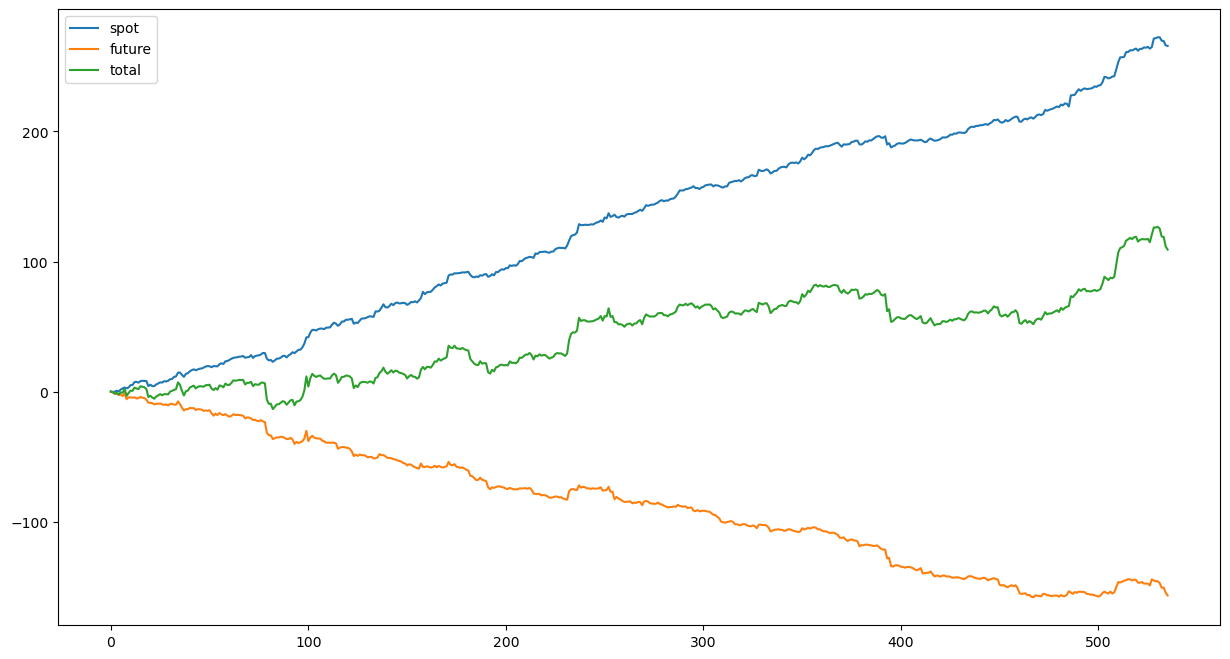

In [18]:
perp[['spot', 'future', 'total']].cumsum().plot(figsize=(15, 8))

In [19]:
import numpy as np

perp['total'].mean() / perp['total'].std() * np.sqrt(365)

1.5919968063154672

In [ ]:
max_equity = ret.cummax()
drawdown = rs_equity - max_equity
        mdd = -drawdown.min()